## a) Business Understanding
**Formulación del problema**  
Interconnect busca identificar de forma proactiva a los clientes con mayor riesgo de cancelar su suscripción (churn) para ofrecerles promociones y reducir la pérdida de ingresos.

**KPIs de éxito**  
- **Principal:** AUC-ROC ≥ 0.85 en el conjunto de test.  
- **Secundario:** Precision-Recall AUC (Average Precision) ≥ 0.50 para priorizar efectividad en campañas.
- **Impacto de negocio:** Reducción estimada de churn en al menos 5% traducida en ahorro de costos de adquisición.

**Hipótesis iniciales**  
1. Clientes con contratos de tipo "Month-to-month" (mensual) presentan mayor churn que los de largo plazo.  
2. El uso de facturación electrónica (PaperlessBilling) aumenta la probabilidad de abandono por falta de vínculo físico.  
3. Mayor diversidad de servicios contratados (internet, teléfono, streaming) reduce el churn.  
4. Clientes que pagan con "Electronic check" tienen mayor churn que métodos automatizados.

## b) Data Understanding
- **Carga de datos:** Leer `contract.csv`, `personal.csv`, `internet.csv`, `phone.csv` desde carpeta `data/`.
- **Exploración inicial:** Dimensiones, tipos, valores faltantes, distribuciones.
- **Data dictionary:** Breve tabla con descripción de variables principales.
- **Verificación de supuestos:** Distribución de la variable objetivo `Churn`, balance de clases.


In [1]:
import pandas as pd
contract = pd.read_csv('../data/contract.csv', low_memory=False)
internet = pd.read_csv('../data/internet.csv', low_memory=False)
personal = pd.read_csv('../data/personal.csv', low_memory=False)
phone = pd.read_csv('../data/phone.csv', low_memory=False)

In [2]:
import os
import sys
project_root = os.path.dirname(os.path.abspath(''))
src_path = os.path.join(project_root, 'src')
sys.path.append(src_path)
from eda import Eda

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
Eda.analisis_exploratorio("Contract", contract)

|                                               Análisis de la tabla Contract                                               |
Dimensiones: (7043, 8)

Estadísticas descriptivas y problemas de calidad:
|                               | customerid      | begindate       | enddate         | type            | paperlessbilling   | paymentmethod   | monthlycharges     | totalcharges    |
|:------------------------------|:----------------|:----------------|:----------------|:----------------|:-------------------|:----------------|:-------------------|:----------------|
| Valores Únicos                | 7043            | 77              | 5               | 3               | 2                  | 4               | 1585               | 6531            |
| Media                         | -               | -               | -               | -               | -                  | -               | 64.76169246059918  | -               |
| Desviación Estándar           | -               | -           

<Axes: title={'center': 'Contract Type'}, xlabel='Type'>

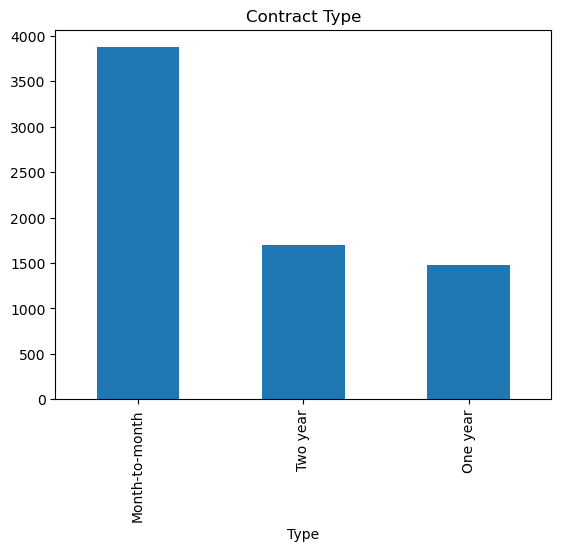

In [5]:
contract["Type"].value_counts().plot(kind="bar", title="Contract Type")

<Axes: title={'center': 'Payment Method'}, xlabel='PaymentMethod'>

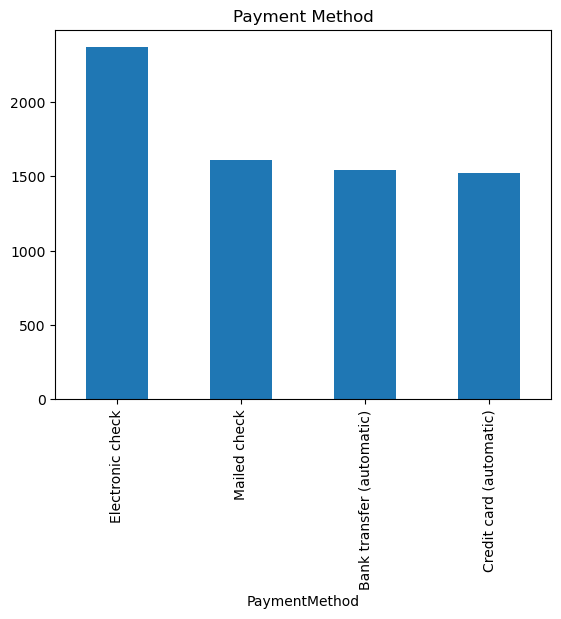

In [6]:
contract["PaymentMethod"].value_counts().plot(kind="bar", title="Payment Method")

No encontramos patrones inusuales en los gráficos

In [7]:
contract["BeginDate"] = pd.to_datetime(contract["BeginDate"])
display(contract["BeginDate"].min())
display(contract["BeginDate"].max())

Timestamp('2013-10-01 00:00:00')

Timestamp('2020-02-01 00:00:00')

En los contratos no encontramos data faltante, los duplicados son esperadosy tampoco encontramos outliers. Lo que encontramos es varias variables que podemos transformarlas en booleanas o categoricas. Se puede mantener el formato del nombre de las columnas.
Contamos con data desde octubre del 2013 hasta febrero 01 del 2020

In [8]:
display(internet.head())
Eda.analisis_exploratorio("Internet", internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


|                                               Análisis de la tabla Internet                                               |
Dimensiones: (5517, 8)

Estadísticas descriptivas y problemas de calidad:
|                               | customerid      | internetservice   | onlinesecurity   | onlinebackup    | deviceprotection   | techsupport     | streamingtv     | streamingmovies   |
|:------------------------------|:----------------|:------------------|:-----------------|:----------------|:-------------------|:----------------|:----------------|:------------------|
| Valores Únicos                | 5517            | 2                 | 2                | 2               | 2                  | 2               | 2               | 2                 |
| Media                         | -               | -                 | -                | -               | -                  | -               | -               | -                 |
| Desviación Estándar           | -               | -   

<Axes: title={'center': 'Internet Service'}, xlabel='InternetService'>

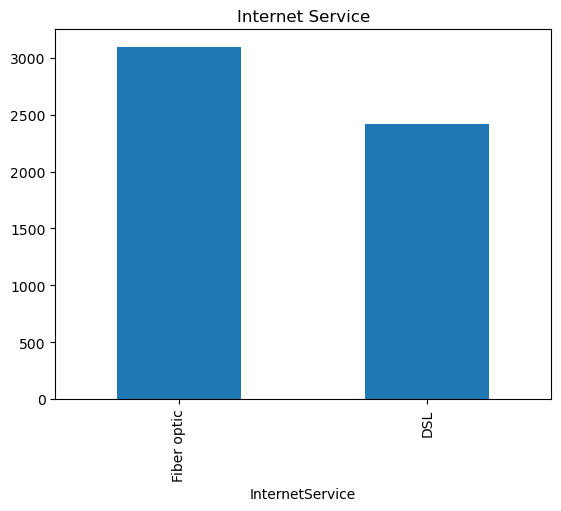

In [9]:
internet["InternetService"].value_counts().plot(kind="bar", title="Internet Service")

Igual que en el caso anterior la data esat limpia y solo necesita codificación correcta de variables categoricas y booleanas. Tampoco se detectaron anomalias como desbalanceos con el gráfico de barras


In [10]:
display(personal.head())
Eda.analisis_exploratorio("Personal", personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


|                                               Análisis de la tabla Personal                                               |
Dimensiones: (7043, 5)

Estadísticas descriptivas y problemas de calidad:
|                               | customerid      | gender          | seniorcitizen    | partner         | dependents      |
|:------------------------------|:----------------|:----------------|:-----------------|:----------------|:----------------|
| Valores Únicos                | 7043            | 2               | 2                | 2               | 2               |
| Media                         | -               | -               | -                | -               | -               |
| Desviación Estándar           | -               | -               | -                | -               | -               |
| Mínimo                        | -               | -               | -                | -               | -               |
| Mediana                       | -               

<Axes: title={'center': 'Gender'}, xlabel='gender'>

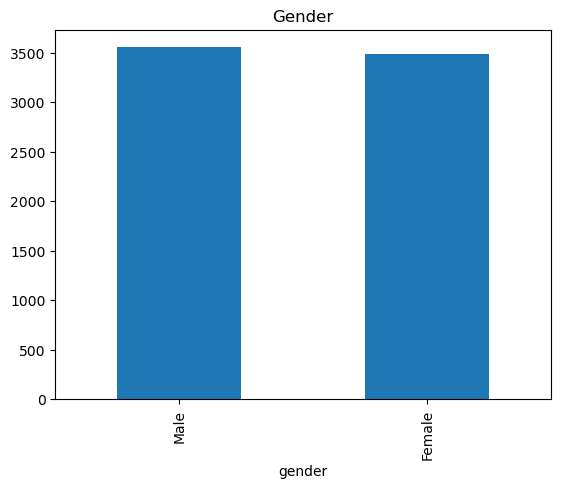

In [11]:
personal["gender"].value_counts().plot(kind="bar", title="Gender")

De igual forma personal no presenta anomalias de ningun tipo, solo hay que transformar las columnas a sus datos apropiados.

In [12]:
display(phone.head())
Eda.analisis_exploratorio("Phone", phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


|                                                 Análisis de la tabla Phone                                                |
Dimensiones: (6361, 2)

Estadísticas descriptivas y problemas de calidad:
|                               | customerid      | multiplelines   |
|:------------------------------|:----------------|:----------------|
| Valores Únicos                | 6361            | 2               |
| Media                         | -               | -               |
| Desviación Estándar           | -               | -               |
| Mínimo                        | -               | -               |
| Mediana                       | -               | -               |
| Máximo                        | -               | -               |
| Tipos de datos                | [<class 'str'>] | [<class 'str'>] |
| NaN/Null                      | 0               | 0               |
| Duplicados únicos             | 0               | 6359            |
| Duplicados totales          

<Axes: title={'center': 'Multiple Lines'}, xlabel='MultipleLines'>

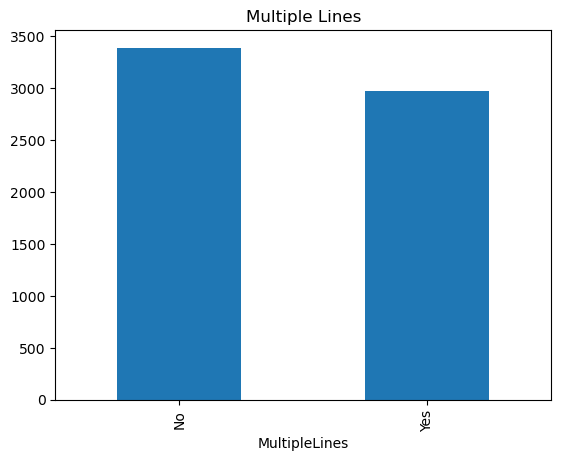

In [13]:
phone["MultipleLines"].value_counts().plot(kind="bar", title="Multiple Lines")

Phone tampoco presenta anomalias, solo convertir sus columnas a sus datos correspondientes.

### Data Dictionary
| Dataset   | Variable           | Tipo     | Descripción                                     |
|-----------|--------------------|----------|-------------------------------------------------|
| contract  | customerID         | ID       | Identificador único de cliente                  |
| contract  | BeginDate          | Fecha    | Fecha de inicio de suscripción                  |
| contract  | EndDate            | Fecha    | Fecha de fin / "No" si activo                  |
| contract  | Type               | Categórica | Month-to-month, One year, Two year             |
| contract  | PaperlessBilling   | Categórica | Facturación electrónica (Yes/No)               |
| contract  | PaymentMethod      | Categórica | Método de pago                                  |
| contract  | MonthlyCharges     | Numérica | Cargo mensual                                   |
| contract  | TotalCharges       | Numérica | Cargo total acumulado                           |
| personal  | gender             | Categórica | Género (Male/Female)                           |
| personal  | SeniorCitizen      | Binaria  | Mayor de 65 años (1)                            |
| personal  | Partner            | Binaria  | Tiene pareja (Yes/No)                           |
| personal  | Dependents         | Binaria  | Tiene dependientes (Yes/No)                     |
| internet  | InternetService    | Categórica | DSL, Fiber optic                               |
| internet  | OnlineSecurity, ...| Binarias | Servicios adicionales (Yes/No)                  |
| phone     | MultipleLines      | Categórica | Líneas múltiples (Yes/No)   

## c) Data Preparation
- **Unificación de fuentes:** Merge por `customerID`.
- **Limpieza:** Tratamiento de duplicados y valores atípicos.
- **Imputación:** Estrategias para datos faltantes (media, moda, indicador).
- **Ingeniería de variables:**
  - Encoding variables categóricas (One-Hot, Label Encoding).
  - Escalado de variables numéricas (StandardScaler).
  - Creación de features: número total de servicios, indicadores técnicos.

Para ahorrar tiempo no se va a tratar la conversión a tipos de datos adecuados por cada archivo individual sino que se lo hara en su versión unificada

In [14]:
df_unified = pd.merge(contract, internet, on="customerID", how="outer")
df_unified = pd.merge(df_unified, personal, on="customerID", how="outer")
df_unified = pd.merge(df_unified, phone, on="customerID", how="outer")
print(f"Dimensiones nuevo dataset: {df_unified.shape}")
df_unified.head()

Dimensiones nuevo dataset: (7043, 20)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,0002-ORFBO,2019-05-01,No,One year,Yes,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,Yes,No,Female,0,Yes,Yes,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,No,Mailed check,59.9,542.4,DSL,No,No,No,No,No,Yes,Male,0,No,No,Yes
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.9,280.85,Fiber optic,No,No,Yes,No,No,No,Male,0,No,No,No
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.0,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes,Male,1,Yes,No,No
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,83.9,267.4,Fiber optic,No,No,No,Yes,Yes,No,Female,1,Yes,No,No


In [15]:
df_unified["BeginDate"] = pd.to_datetime(df_unified["BeginDate"])

In [16]:
Eda.analisis_exploratorio("Unified", df_unified)

|                                                Análisis de la tabla Unified                                               |
Dimensiones: (7043, 20)

Estadísticas descriptivas y problemas de calidad:
|                               | customerid      | begindate                                            | enddate         | type            | paperlessbilling   | paymentmethod   | monthlycharges     | totalcharges    | internetservice   | onlinesecurity   | onlinebackup    | deviceprotection   | techsupport     | streamingtv     | streamingmovies   | gender          | seniorcitizen    | partner         | dependents      | multiplelines   |
|:------------------------------|:----------------|:-----------------------------------------------------|:----------------|:----------------|:-------------------|:----------------|:-------------------|:----------------|:------------------|:-----------------|:----------------|:-------------------|:----------------|:----------------|:------------------

Con esta unificación se presentaron varios valores nulos en las siguiente columnas:

In [17]:
# ¿Cuántos clientes sin internet?
print("InternetService nulos:", df_unified['InternetService'].isna().sum(),
      "/", df_unified.shape[0])

# ¿Y servicios asociados?
for col in ['OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies']:
    print(f"{col} nulos:", df_unified[col].isna().sum())

# ¿Cuántos clientes sin línea telefónica?
print("MultipleLines nulos:", df_unified['MultipleLines'].isna().sum(),
      "/", df_unified.shape[0])


InternetService nulos: 1526 / 7043
OnlineSecurity nulos: 1526
OnlineBackup nulos: 1526
DeviceProtection nulos: 1526
TechSupport nulos: 1526
StreamingTV nulos: 1526
StreamingMovies nulos: 1526
MultipleLines nulos: 682 / 7043


Estos serian usuarios que no cuentan o nunca contaron con estos servicios por lo que podemos imputarlos con "No"

In [18]:
# Diccionario de valores de relleno
fill_values = {
    'InternetService': 'No',
    'MultipleLines':    'No',
    # para los flags de internet:
    'OnlineSecurity':   'No',
    'OnlineBackup':     'No',
    'DeviceProtection': 'No',
    'TechSupport':      'No',
    'StreamingTV':      'No',
    'StreamingMovies':  'No',
}

# Rellenamos todas en un solo paso
df_unified = df_unified.fillna(value=fill_values)

Con esto hecho podemos pasar a asegurar los tipos de datos de cada variable

In [19]:
# Variables booleanas → 0/1
bool_cols = [
    'PaperlessBilling',
    'Partner',
    'Dependents',
    'SeniorCitizen',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
]

# Relleno de NaN como 'No' para las de texto y luego mapeo
df_unified[bool_cols] = (
    df_unified[bool_cols]
      .replace({'Yes': 1, 'No': 0, True: 1, False: 0})
      .astype(int)
)

# Verificación
print(df_unified[bool_cols].head())
print({c: df_unified[c].unique().tolist() for c in bool_cols})


   PaperlessBilling  Partner  Dependents  SeniorCitizen  MultipleLines  \
0                 1        1           1              0              0   
1                 0        0           0              0              1   
2                 1        0           0              0              0   
3                 1        1           0              1              0   
4                 1        1           0              1              0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            1            1   
1               0             0                 0            0            0   
2               0             0                 1            0            0   
3               0             1                 1            0            1   
4               0             0                 0            1            1   

   StreamingMovies  
0                0  
1                1  
2                

/tmp/ipykernel_709146/1882277565.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Yes': 1, 'No': 0, True: 1, False: 0})


In [20]:
# Añadimos las variables de interés
df_unified['HasInternet'] = (df_unified['InternetService'] != 'No').astype(int)
df_unified['HasPhone']    = (df_unified['MultipleLines']    != 'No').astype(int)

In [21]:
# Variables categóricas → One-Hot Encoding (drop_first)
cat_cols = [
    'Type',
    'PaymentMethod',
    'InternetService',
    'gender',
    'MultipleLines'
]

# One-Hot y concatenación
dummies = pd.get_dummies(df_unified[cat_cols], drop_first=True, dtype=int)
df_unified = pd.concat([
    df_unified.drop(columns=cat_cols),
    dummies
], axis=1)

# Verificación
print("Dummies creadas:", [c for c in df_unified.columns if '_' in c and c.split('_')[0] in cat_cols])

Dummies creadas: ['Type_One year', 'Type_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'gender_Male']


In [22]:
df_unified['MonthlyCharges'] = pd.to_numeric(df_unified['MonthlyCharges'], errors='coerce')
df_unified['TotalCharges']   = pd.to_numeric(df_unified['TotalCharges'], errors='coerce')

In [23]:
# Impute TotalCharges with MonthlyCharges for these new customers
df_unified.loc[df_unified['TotalCharges'].isna(), 'TotalCharges'] = df_unified['MonthlyCharges'].max()

In [24]:
df_unified["EndDate"].value_counts()

EndDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64

In [25]:
df_unified["IsChurn"] = (df_unified["EndDate"] != "No").astype(int)

<Axes: title={'center': 'IsChurn'}, xlabel='IsChurn'>

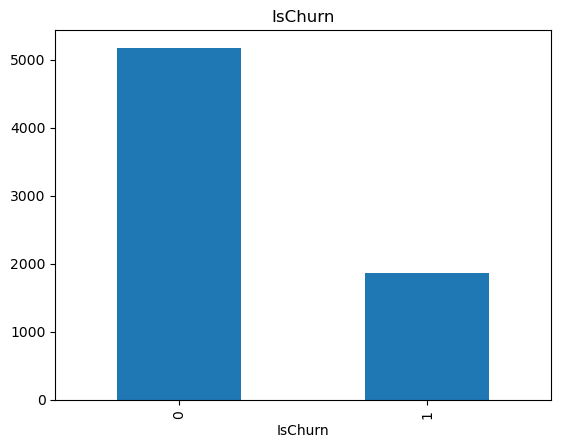

In [26]:
df_unified["IsChurn"].value_counts().plot(kind="bar", title="IsChurn")

### Feature engineering

In [ ]:
import pandas as pd
import numpy as np

# Ingenieria de caracteristicas hecha con ayuda de ChatGPT
hoy = pd.Timestamp('2020-02-01')  # fecha de corte para clientes activos (Max BeginDate)
df_unified['EndDate'] = df_unified['EndDate'].replace('No', pd.NaT)
df_unified['EndDate'] = pd.to_datetime(df_unified['EndDate'])
servicios = ['OnlineSecurity','OnlineBackup','DeviceProtection',
             'TechSupport','StreamingTV','StreamingMovies','MultipleLines']
df_unified['NumServices'] = df_unified[servicios].apply(lambda x: (x=='Yes').sum(), axis=1)

# Se decidio no utilizar por generar muchos valores nulos
# # Calcular TenureMonths
# df_unified['TenureMonths'] = (
#     (df_unified['EndDate'].dt.year - df_unified['BeginDate'].dt.year) * 12
#     + (df_unified['EndDate'].dt.month - df_unified['BeginDate'].dt.month)
# )

# # ChargePerMonth
# df_unified['ChargePerMonth'] = np.where(
#     df_unified['TenureMonths'] > 0,
#     df_unified['TotalCharges'] / df_unified['TenureMonths'],
#     df_unified['MonthlyCharges']
# )

# # TenureYears y TenureBucket
# df_unified['TenureYears'] = (df_unified['TenureMonths'] / 12).round(2)
# bins = [-1, 6, 12, 24, np.inf]
# labels = ['<=6m','6-12m','1-2y','>2y']
# df_unified['TenureBucket'] = pd.cut(df_unified['TenureMonths'], bins=bins, labels=labels)

# BeginMonth y BeginYear
df_unified['BeginMonth'] = df_unified['BeginDate'].dt.month
df_unified['BeginYear']  = df_unified['BeginDate'].dt.year

# NumStreaming = StreamingTV + StreamingMovies
# Primero aseguramos que Streaming* sean 0/1
for col in ['StreamingTV','StreamingMovies']:
    df_unified[col] = df_unified[col].replace({'Yes':1,'No':0}).astype(int)
df_unified['NumStreaming'] = df_unified['StreamingTV'] + df_unified['StreamingMovies']

# AvgChargePerService
df_unified['AvgChargePerService'] = np.where(
    df_unified['NumServices'] > 0,
    df_unified['MonthlyCharges'] / df_unified['NumServices'],
    df_unified['MonthlyCharges']
)

# LongTermCustomer
# df_unified['LongTermCustomer'] = (df_unified['TenureMonths'] > 24).astype(int)


df_unified.drop(columns=['customerID', 'BeginDate', 'EndDate'], inplace=True)
print(f"Dimensiones nuevo dataset: {df_unified.shape}")

Dimensiones nuevo dataset: (7043, 29)


## d) Modeling
En esta sección se seleccionaron y entrenaron tres algoritmos supervisados con el objetivo de predecir la variable objetivo (churn):

Logistic Regression: un modelo lineal de referencia.

Random Forest: modelo de tipo ensemble basado en árboles.

XGBoost: algoritmo de boosting basado en gradiente, altamente eficiente.

Cada modelo fue ajustado con cross-validation estratificada de 5 pliegues utilizando la métrica AUC-ROC como criterio principal. Además, se aplicó un escalamiento de variables donde fue necesario (por ejemplo, en regresión logística).

In [31]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Preparar X,y 
X = df_unified.drop(columns=['IsChurn'])
y = df_unified['IsChurn']

# Split estratificado 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Manejo de desbalance 
if y_train.mean() < 0.25:
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

# Definir modelo
models = {
    'LogisticRegression': Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42))
    ]),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', random_state=42)
}

# Cross-validation AUC-ROC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train,
                             cv=cv, scoring='roc_auc', n_jobs=-1)
    cv_results[name] = scores.mean()
    print(f"{name} CV AUC-ROC: {scores.mean():.3f} ± {scores.std():.3f}")

# Entrenar final y evaluación en test
eval_df = []
for name, model in models.items():
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:,1]
    auc  = roc_auc_score(y_test, proba)
    ap   = average_precision_score(y_test, proba)
    eval_df.append({
        'Model': name,
        'CV_AUC': cv_results[name],
        'Test_AUC': auc,
        'Test_AP':  ap
    })

eval_df = pd.DataFrame(eval_df).sort_values('Test_AUC', ascending=False)

LogisticRegression CV AUC-ROC: 0.843 ± 0.004
RandomForest CV AUC-ROC: 0.874 ± 0.003
XGBoost CV AUC-ROC: 0.906 ± 0.007


## e) Evaluation
Se evaluó el desempeño de los modelos tanto en validación cruzada como en el conjunto de test. Se utilizaron dos métricas principales:

AUC-ROC (Área bajo la curva ROC): principal métrica de comparación, útil para datasets desbalanceados.

Average Precision (AP): métrica complementaria basada en la curva precisión-recall, también robusta al desbalance.

Resultados:

In [33]:
print(eval_df.to_string(index=False))

             Model   CV_AUC  Test_AUC  Test_AP
           XGBoost 0.905744  0.915406 0.858514
      RandomForest 0.874419  0.876112 0.762916
LogisticRegression 0.843479  0.836229 0.638286


Conclusión: XGBoost superó al resto de los modelos en ambas métricas, por lo que se considera el mejor modelo para este problema.


/tmp/ipykernel_709146/2279576747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Gain', y='Feature', palette='viridis')


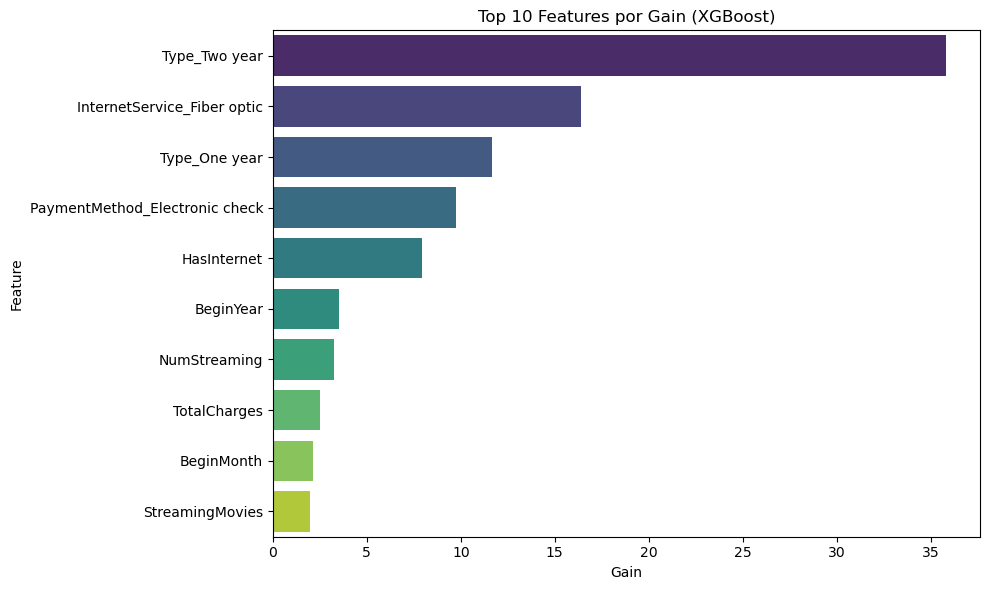

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de tener entrenado el modelo XGBoost con las variables X_train
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Obtener importancias
importances = xgb_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Gain': list(importances.values())
}).sort_values(by='Gain', ascending=False).head(10)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Gain', y='Feature', palette='viridis')
plt.title('Top 10 Features por Gain (XGBoost)')
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Analizando el gráfico de importancia de características del modelo XGBoost para predecir el abandono (churn) de clientes en Interconnect, se destaca claramente que el tipo de contrato a dos años ("Type_Two year") es el factor más influyente con diferencia, seguido por el servicio de internet de fibra óptica y los contratos de un año. Los métodos de pago electrónico y la disponibilidad de internet también tienen peso significativo. Esto sugiere que la permanencia del cliente está fuertemente determinada por compromisos contractuales a largo plazo, mientras que la tecnología de conexión y los métodos de pago modernos también influyen en la decisión de mantener el servicio. La estrategia de retención debería enfocarse en ofrecer contratos más extensos y promociones específicas para clientes con servicio de fibra óptica que muestren signos de posible abandono.

## f) Deployment / Próximos pasos

### Despliegue e integración del modelo
- **Pipeline MLOps:** Exportar el modelo XGBoost optimizado junto con todo el pipeline de preprocesamiento (codificaciones, ingeniería de características) mediante joblib/pickle.
- **API REST con FastAPI:** Implementar un servicio que exponga dos endpoints:
  - `/predict`: Para cálculo en tiempo real de probabilidad de churn para clientes individuales
  - `/batch-predict`: Para procesamiento nocturno de toda la base activa
- **Integración bidireccional con CRM:** Conectar con el sistema de gestión de clientes para activar automáticamente las campañas de retención según el segmento de riesgo.

### Monitoreo de rendimiento y deriva de datos
- **Alertas automáticas:** El sistema detectará:
  - Caída de AUC-ROC > 3% respecto al baseline (0.915)
  - Cambios significativos en la distribución de variables clave, especialmente tipos de contrato
  - Aumento > 5% en la tasa global de churn mensual
- **Reentrenamiento programado:** Mensual con datos frescos, o inmediato si se activa alguna alerta

### Estrategia de retención personalizada basada en insights del modelo
- **Alto riesgo (> 0.85):** 
  - Llamada proactiva ofreciendo migración a contrato de dos años (variable más importante)
  - 25% descuento en el primer trimestre del nuevo contrato
  - Para clientes con fibra óptica: oferta especial de servicios adicionales gratuitos por 6 meses
- **Medio riesgo (0.70-0.85):**
  - Correo electrónico personalizado con oferta de 15% descuento por renovación anticipada
  - Para clientes con pago electrónico: incentivo adicional por mantener este método
- **Bajo riesgo (0.50-0.70):**
  - Notificación en app/SMS con beneficios de fidelidad
  - Encuesta de satisfacción enfocada en servicios de streaming y respaldo

### Plan de validación y mejora continua
- **Experimentos A/B:** Probar diferentes ofertas y mensajes para cada segmento para optimizar la conversión
- **Expansión del modelo:** Desarrollar submodelos específicos para segmentos clave (ej. usuarios de fibra óptica)
- **Estimación de impacto financiero:** Calcular ROI mensual de la estrategia de retención basándose en el lifetime value de clientes salvados vs. costo de incentivos